# LUFlow Network Intrusion Detection Data Exploration

## Libraries and Function Definitions

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import os
import glob

In [ ]:
pd.DataFrame()

In [ ]:
!pip3 install kagglehub

: 

In [ ]:
# Download the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mryanm/luflow-network-intrusion-detection-data-set")

In [2]:
def load_data(data_dir, year=None, month=None, day=None):
    if (year==None): 
        year= '****'
    if (month==None): 
        month = '**'
    if (day==None): 
        day = '**'
    else: 
        day = f"{year}.{month}.{day}"

    data_string = f'{data_dir}/{year}/{month}/{day}/*.csv'

    files = [f for f in glob.glob(data_string, recursive=True)]
    
    return pd.concat([pd.read_csv(f) for f in files])

## Load in the data set

In [ ]:
#load data
year = '2020'
month = '09'
day = '01'

df = load_data(path, year, month, day)
        

## Initial Data Set Exploration

In [4]:
# look for info
df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,13032,786,9200.0,2.225012,9,1,6,786,35930.0,1598928801006691,1598928801006382,28996.3570,benign,0.000309
1,0.0,0,0,16276,58581.0,0.000000,1,0,6,786,443.0,1598928801011067,1598928801011067,0.0000,malicious,0.000000
2,0.0,0,14480,786,9200.0,1.910488,10,0,6,786,35930.0,1598928801090392,1598928801090321,27663.8700,benign,0.000071
3,0.0,0,11774,786,9200.0,2.248017,9,0,6,786,35934.0,1598928801813551,1598928801813279,26468.1560,benign,0.000272
4,12.5,89,51,786,445.0,3.786784,2,2,6,4780,53853.0,1598928801883303,1598928801856985,530.1498,malicious,0.026318


In [5]:
# observe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929443 entries, 0 to 929442
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        929443 non-null  float64
 1   bytes_in       929443 non-null  int64  
 2   bytes_out      929443 non-null  int64  
 3   dest_ip        929443 non-null  int64  
 4   dest_port      917885 non-null  float64
 5   entropy        929443 non-null  float64
 6   num_pkts_out   929443 non-null  int64  
 7   num_pkts_in    929443 non-null  int64  
 8   proto          929443 non-null  int64  
 9   src_ip         929443 non-null  int64  
 10  src_port       917885 non-null  float64
 11  time_end       929443 non-null  int64  
 12  time_start     929443 non-null  int64  
 13  total_entropy  929443 non-null  float64
 14  label          929443 non-null  object 
 15  duration       929443 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 113.5+ MB


In [6]:
df.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,9.294430e+05,929443.000000,929443.000000,929443.000000,917885.000000,929443.000000,929443.000000,929443.000000,929443.000000,929443.000000,917885.000000,9.294430e+05,9.294430e+05,9.294430e+05,929443.000000
mean,1.532433e+06,438.032915,2378.464685,4047.312910,12374.705783,3.096021,5.747252,3.463563,5.975109,17225.735239,34654.684959,1.453667e+15,1.453886e+15,9.205843e+03,0.831751
std,4.676653e+07,2186.714327,6149.506420,20688.106006,16413.579558,2.308290,19.204751,12.387558,0.887329,41618.449615,19702.968563,4.362162e+14,4.359108e+14,2.913246e+04,11.189741
min,0.000000e+00,0.000000,0.000000,174.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.598929e+10,1.598921e+10,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,0.000000,786.000000,445.000000,0.000000,1.000000,0.000000,6.000000,786.000000,12601.000000,1.598929e+15,1.598929e+15,0.000000e+00,0.000000
50%,0.000000e+00,0.000000,191.000000,786.000000,9200.000000,3.786784,2.000000,1.000000,6.000000,786.000000,35936.000000,1.598932e+15,1.598932e+15,2.107758e+03,0.000156
75%,3.450000e+01,270.000000,1628.000000,786.000000,9200.000000,4.623701,6.000000,3.000000,6.000000,17501.000000,52141.000000,1.598937e+15,1.598937e+15,1.277279e+04,0.200367
max,4.294967e+09,65228.000000,65531.000000,398722.000000,65534.000000,101.899460,255.000000,255.000000,132.000000,398722.000000,65535.000000,1.599005e+15,1.599005e+15,4.707551e+06,10110.875000


In [7]:
# check for nans and duplicates

In [8]:
for col in df.columns: 
    print(col, df[col].isna().sum(), df[col].nunique())

print(f"number of duplicates: {df.duplicated().sum()}")

avg_ipt 0 30779
bytes_in 0 15361
bytes_out 0 26060
dest_ip 0 308
dest_port 11558 26539
entropy 0 324208
num_pkts_out 0 256
num_pkts_in 0 256
proto 0 6
src_ip 0 720
src_port 11558 53173
time_end 0 923622
time_start 0 922888
total_entropy 0 342860
label 0 3
duration 0 273336
number of duplicates: 847


In [9]:
# drop nans and duplicates
df.dropna(inplace = True)

df.drop_duplicates(inplace = True) 

In [10]:
# check that the cleaning has worked
for col in df.columns: 
    print(col, df[col].isna().sum(), df[col].nunique())

print(f"number of duplicates: {df.duplicated().sum()}")

avg_ipt 0 30502
bytes_in 0 15360
bytes_out 0 26060
dest_ip 0 289
dest_port 0 26539
entropy 0 323932
num_pkts_out 0 256
num_pkts_in 0 256
proto 0 2
src_ip 0 701
src_port 0 53173
time_end 0 912087
time_start 0 911352
total_entropy 0 342536
label 0 3
duration 0 272895
number of duplicates: 0


## Feature engineering

In [11]:
# byte/ packet features
df['packet_exchange'] = df['num_pkts_out'] - df['num_pkts_in']
#df['packet_frequency'] = df['num_pkts_in']/df['duration']
df['total_packets'] = df['num_pkts_in']+df['num_pkts_out']
df['total_bytes'] = df['bytes_out']+df['bytes_in']
df['byte_diff'] = df['bytes_out']-df['bytes_in']

# time features
splits = ['day', 'hour', 'minute', 'second', 'day_of_week']
for col in ['time_start', 'time_end']: 
    df[col] = pd.to_datetime(df[col])
    for split in splits: 
        df[f'{col}_{split}'] = getattr(df[col].dt, split)



In [12]:
df.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration',
       'packet_exchange', 'total_packets', 'total_bytes', 'byte_diff',
       'time_start_day', 'time_start_hour', 'time_start_minute',
       'time_start_second', 'time_start_day_of_week', 'time_end_day',
       'time_end_hour', 'time_end_minute', 'time_end_second',
       'time_end_day_of_week'],
      dtype='object')

## Sample the dataset

In [13]:
# take sample to look at
df = df.sample(frac = 0.05, random_state = 42)

In [14]:
df['label'].value_counts(normalize=True)

benign       0.477744
malicious    0.457222
outlier      0.065034
Name: label, dtype: float64

In [15]:
# malicious is well represented

## Feature Correlation

In [16]:
# calculate correlation map
corr_map = df.corr()

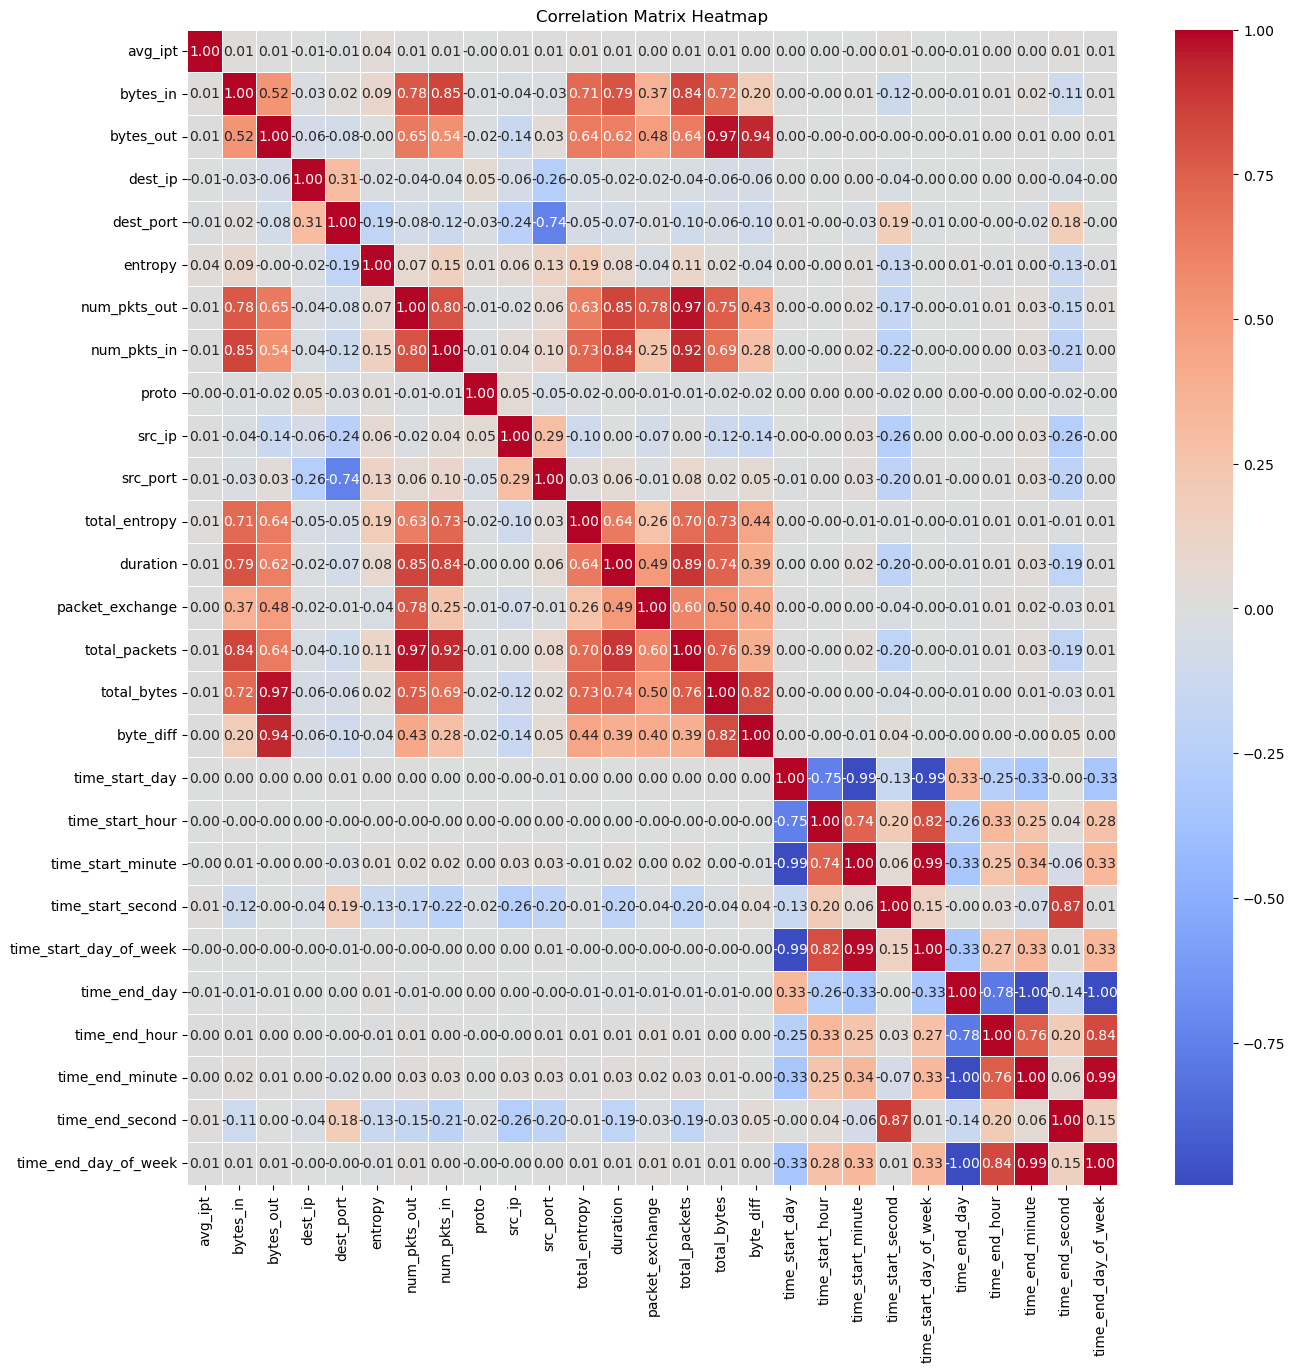

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(corr_map, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# Remove features where correlation is > 0.9

corr_matrix = corr_map.abs()

upper_tri = corr_matrix.where(
    pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print(f"Columns to drop {' '.join(col for col in to_drop)}")

# drop columns with high correlation
df = df.drop(to_drop, axis=1)

Columns to drop total_packets total_bytes byte_diff time_start_minute time_start_day_of_week time_end_minute time_end_day_of_week


C:\Users\massey_j\AppData\Local\Temp\ipykernel_22408\611290990.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool)


## Outlier Analysis / Exploration

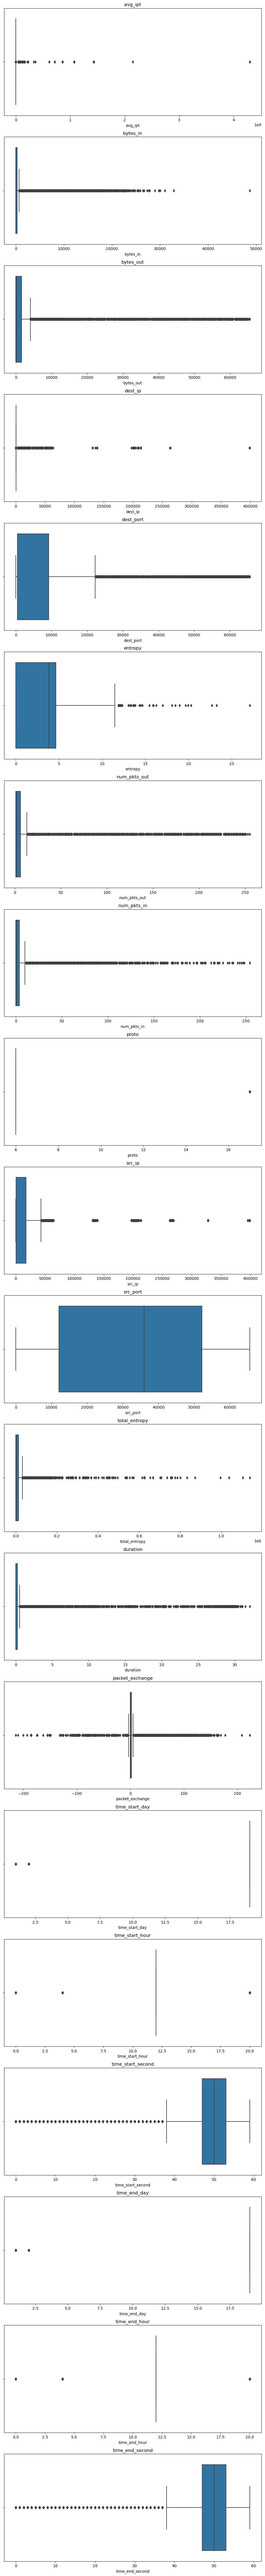

In [19]:
#outlier analysis 
cols_to_plot =df.drop(columns = ['time_end', 'time_start', 'label']).columns
fig, ax = plt.subplots(len(cols_to_plot), figsize= (12,6*len(cols_to_plot)))
for i, col in enumerate(cols_to_plot): 
    sns.boxplot(data = df, x = col, ax = ax[i])
    ax[i].set_title(col)
plt.show()

In [20]:
# make proto has categorical features, so make category and ignore from outlier 

df['proto'] = df['proto'].astype("category")

# drop src_ip, src_port, dest_ip and dest_port because not realistic
# drop time start and end
cols_to_drop = ['src_ip', 'src_port', 'dest_ip', 'dest_port', 'time_start', 'time_end']
df = df.drop(columns=cols_to_drop)

In [21]:
# Remove outliers
print(f"length before: {len(df)}")
df = df.copy()
for col in df.drop(columns =  ['label', 'proto']).columns: 
    Q1 = df[col].quantile(0.05)  
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    # Filter the entire DataFrame based on this column's IQR
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

print(f"length after: {len(df)}")


length before: 45853
length after: 43041


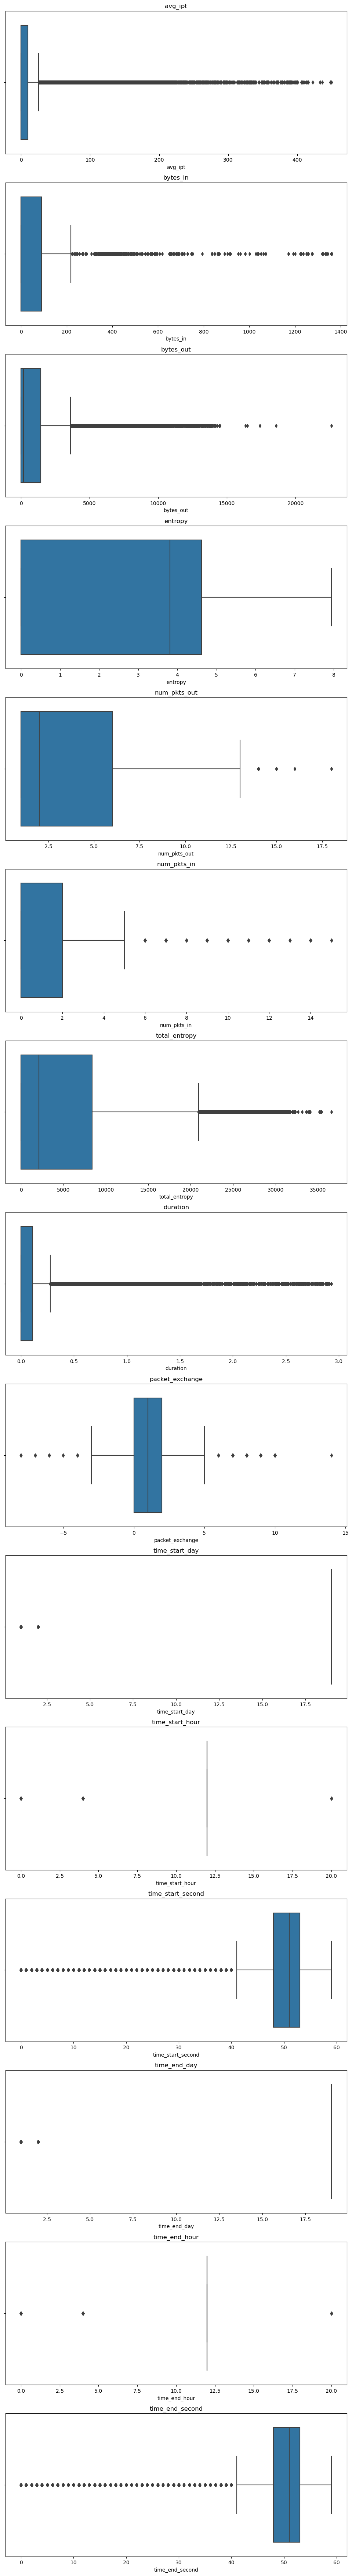

In [22]:
#take another look at the data 
cols_to_plot = df.drop(columns =  ['label', 'proto']).columns
fig, ax = plt.subplots(len(cols_to_plot), figsize= (12,6*len(cols_to_plot)))
for i, col in enumerate(cols_to_plot): 
    sns.boxplot(data = df, x = col, ax = ax[i])
    ax[i].set_title(col)
plt.show()
plt.show()

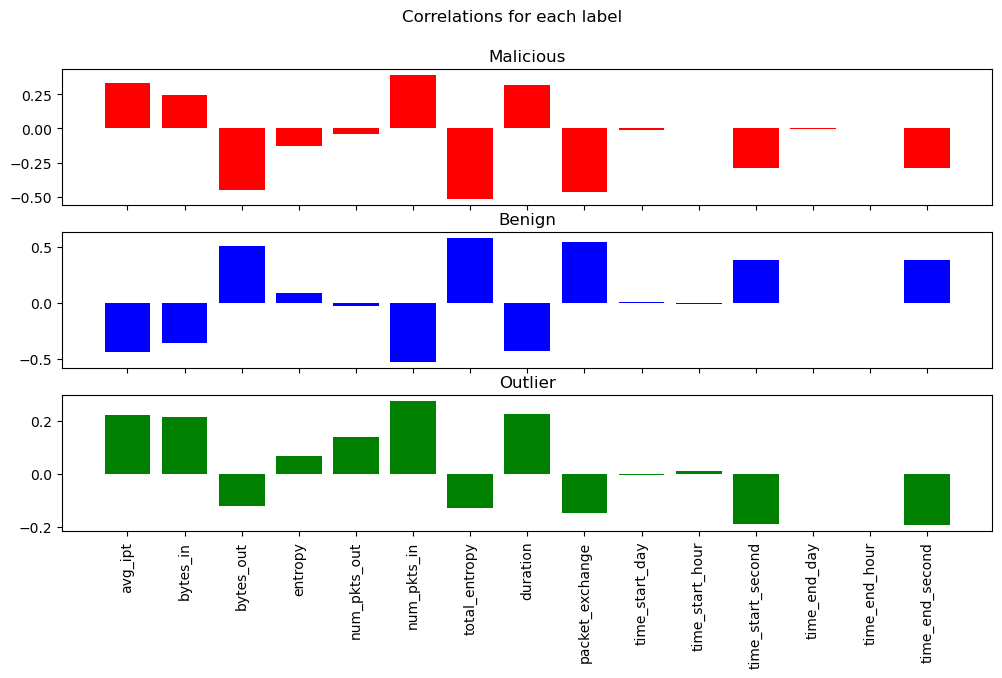

In [23]:
fig, ax = plt.subplots(3, sharex=True, figsize = (12,6))
new_df = df.copy()
# malicious
test_df = new_df.join(pd.get_dummies(df['label'], prefix='label')).drop(columns = ['label_benign','label','label_outlier'])
test = test_df.corr()['label_malicious']
ax[0].bar(test.index[:-1], test.values[:-1], color = 'r')
ax[0].set_title("Malicious")
# benign
new_df = df.copy()
test_df = new_df.join(pd.get_dummies(df['label'], prefix='label')).drop(columns = ['label_malicious','label','label_outlier'])
test = test_df.corr()['label_benign']
ax[1].bar(test.index[:-1], test.values[:-1], color = 'b')
ax[1].set_title("Benign")
# outiler
new_df = df.copy()
test_df = new_df.join(pd.get_dummies(df['label'], prefix='label')).drop(columns = ['label_benign','label','label_malicious'])
test = test_df.corr()['label_outlier']
ax[2].bar(test.index[:-1], test.values[:-1], color = 'g')
ax[2].set_title("Outlier")
plt.xticks(rotation=90)
plt.suptitle("Correlations for each label")
plt.show()
    

In [24]:
# different features have different relationships to the three labels.

## EDA

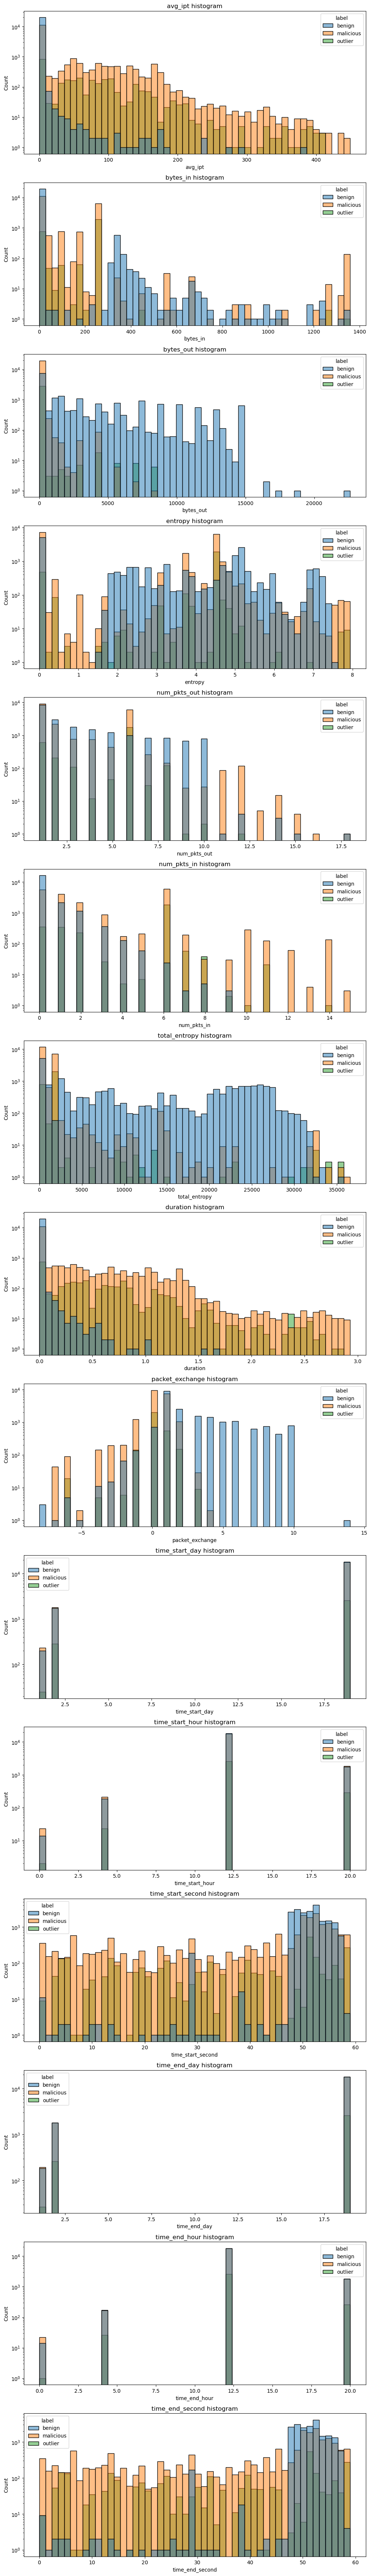

In [25]:
cols_to_plot = df.drop(columns = ['label', 'proto']).columns
fig, ax = plt.subplots(len(cols_to_plot), figsize= (12,6*len(cols_to_plot)))
for i, col in enumerate(cols_to_plot): 
    sns.histplot(data = df, x = col, hue = 'label', bins = 50, ax = ax[i])
    ax[i].set_yscale('log')
    ax[i].set_title(f"{col} histogram")
plt.show()

## Data preparation for ML process

In [26]:
# change labels of the label to numbers
df['label'].replace({'benign': 0, 'malicious': 1, 'outlier': 2}, inplace=True)

In [27]:
df.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'entropy', 'num_pkts_out',
       'num_pkts_in', 'proto', 'total_entropy', 'label', 'duration',
       'packet_exchange', 'time_start_day', 'time_start_hour',
       'time_start_second', 'time_end_day', 'time_end_hour',
       'time_end_second'],
      dtype='object')

In [28]:
# split dataset
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'label')
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [29]:
# scale and retry
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Fit the scaler on the training data and transform other sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_validate)

## ML Fitting

### Random Forest

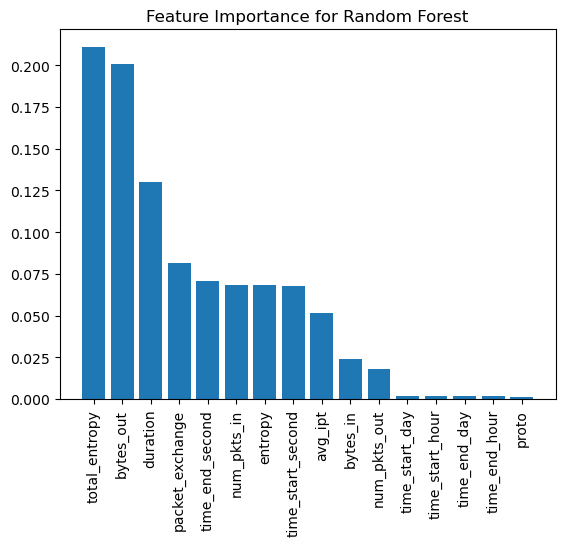

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

# Train the model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns = ['label']).columns,
    'Importance': importances
})

# Sort the DataFrame to plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importance for Random Forest")
plt.xticks(rotation = 90)
plt.show()

In [31]:
# define dictionary for model comparison later
results_dict = {}

Accuracy: 0.8985
Precision: 0.8985
Recall: 0.8985
F1-Score: 0.8978
Confusion Matrix:


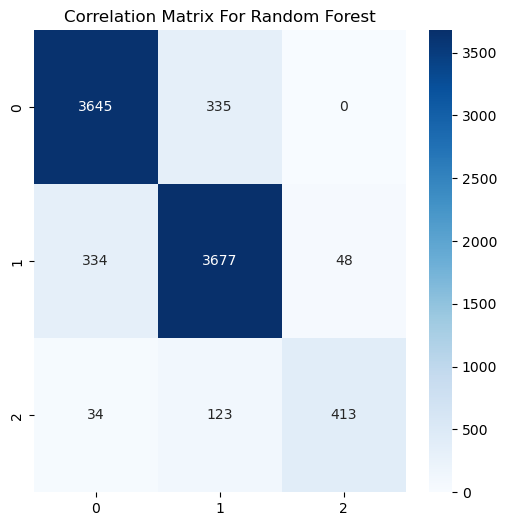

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# predict
rf_predictions = model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')  # 'weighted' handles class imbalance
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# add to dictionary
results_dict.update({"RF": [accuracy, precision, recall, f1]})

# plot confusion matrix
print('Confusion Matrix:')
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique(), ax=ax)
ax.set_title("Correlation Matrix For Random Forest")
plt.show()

In [33]:
# top features
top_features_rf = feature_importance_df.sort_values(by='Importance', ascending = False)[:5]
print(top_features_rf)

            Feature  Importance
7     total_entropy    0.210878
2         bytes_out    0.200835
8          duration    0.129788
9   packet_exchange    0.081768
15  time_end_second    0.070442


### XGBoost

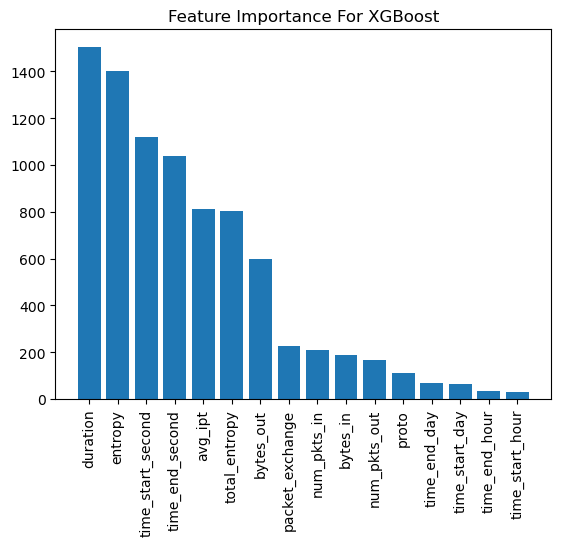

In [34]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Train the model using XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
importances = xgb_model.get_booster().get_score(importance_type='weight')

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
})

# feature importance sort
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# map features to column names
feature_map = {f"f{i}": df.drop(columns=['label']).columns[i] for i in range(len(df.drop(columns=['label']).columns))}

# Apply the feature map to the 'Feature' column in feature_importance_df
feature_importance_df['Feature'] = feature_importance_df['Feature'].map(feature_map)

# Plot the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90) 
plt.title("Feature Importance For XGBoost")
plt.show()


Accuracy: 0.8989
Precision: 0.8997
Recall: 0.8989
F1-Score: 0.8982
Confusion Matrix:


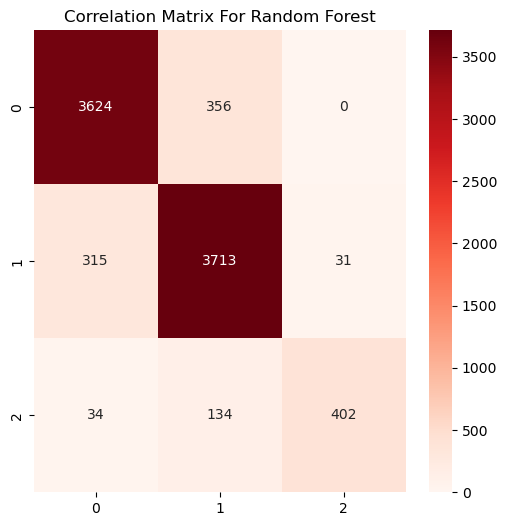

In [35]:
# predict

xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, xgb_predictions)
precision = precision_score(y_test, xgb_predictions, average='weighted')  # 'weighted' handles class imbalance
recall = recall_score(y_test, xgb_predictions, average='weighted')
f1 = f1_score(y_test, xgb_predictions, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# add to dictionatu
results_dict.update({"XGB": [accuracy, precision, recall, f1]})

# plot confusino matrix
print('Confusion Matrix:')
fig, ax = plt.subplots(figsize = (6,6))
ax.set_title("Correlation Matrix For Random Forest")
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=df['label'].unique(), yticklabels=df['label'].unique(), ax=ax)
plt.show()

In [36]:
# top features
top_features_xgb = feature_importance_df.sort_values(by='Importance', ascending = False)[:6]
print(top_features_xgb)

              Feature  Importance
8            duration      1504.0
3             entropy      1402.0
12  time_start_second      1119.0
15    time_end_second      1038.0
0             avg_ipt       810.0
7       total_entropy       804.0


### Neural Network

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network 
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# set up
input_size = X_train_scaled.shape[1]  
hidden_size = 64  
output_size = len(np.unique(y_train))  

# initialize model
nn_model = SimpleNN(input_size, hidden_size, output_size)

# loss and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

# Convert data 
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_validate, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader 
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# Training loop
num_epochs = 50  
train_accuracy_all = []
val_accuracy_all = []

for epoch in range(num_epochs):
    nn_model.train()  
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training step
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()  

        # Accumulate loss and calculate training accuracy
        running_loss += loss.item()
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    avg_train_loss = running_loss / len(train_loader)
    train_accuracy_all.append(train_accuracy)

    # Validation step
    nn_model.eval()  
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  
        for inputs, labels in val_loader:
            outputs = nn_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = correct_val / total_val
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy_all.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Model evaluation on the test set
nn_model.eval()  
with torch.no_grad():  
    outputs = nn_model(X_test_tensor)
    _, predicted_test = torch.max(outputs, 1)
    accuracy = (predicted_test == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/50]
Train Loss: 0.5047, Train Accuracy: 0.7795
Val Loss: 0.4311, Val Accuracy: 0.8145
Epoch [2/50]
Train Loss: 0.4249, Train Accuracy: 0.8145
Val Loss: 0.4063, Val Accuracy: 0.8246
Epoch [3/50]
Train Loss: 0.4059, Train Accuracy: 0.8241
Val Loss: 0.3938, Val Accuracy: 0.8260
Epoch [4/50]
Train Loss: 0.3927, Train Accuracy: 0.8299
Val Loss: 0.3833, Val Accuracy: 0.8352
Epoch [5/50]
Train Loss: 0.3837, Train Accuracy: 0.8314
Val Loss: 0.3759, Val Accuracy: 0.8322
Epoch [6/50]
Train Loss: 0.3763, Train Accuracy: 0.8315
Val Loss: 0.3735, Val Accuracy: 0.8350
Epoch [7/50]
Train Loss: 0.3700, Train Accuracy: 0.8352
Val Loss: 0.3729, Val Accuracy: 0.8194
Epoch [8/50]
Train Loss: 0.3648, Train Accuracy: 0.8352
Val Loss: 0.3644, Val Accuracy: 0.8363
Epoch [9/50]
Train Loss: 0.3610, Train Accuracy: 0.8369
Val Loss: 0.3596, Val Accuracy: 0.8356
Epoch [10/50]
Train Loss: 0.3581, Train Accuracy: 0.8353
Val Loss: 0.3578, Val Accuracy: 0.8384
Epoch [11/50]
Train Loss: 0.3552, Train Accuracy:

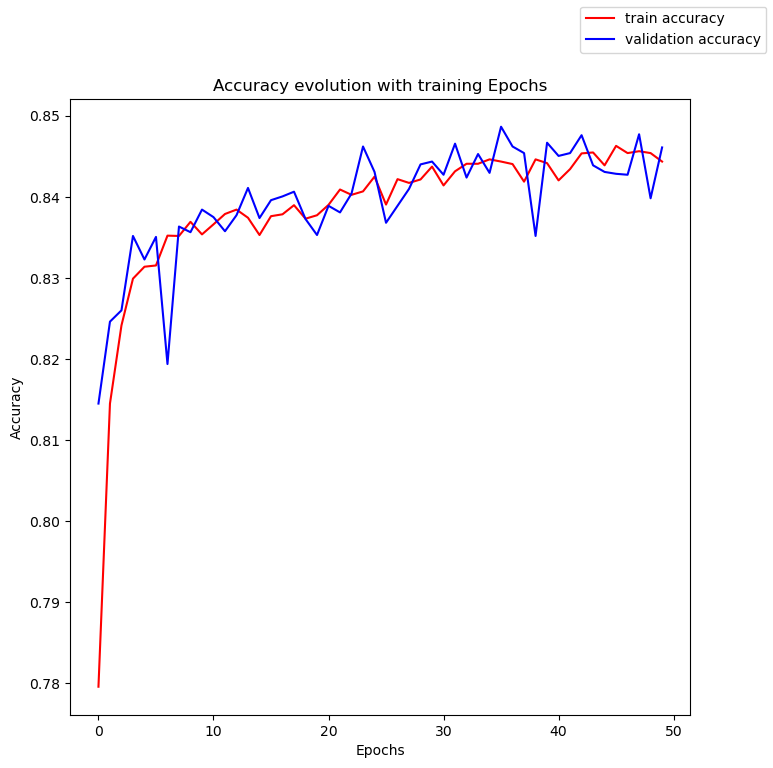

In [38]:
# plot results
fig, ax  = plt.subplots(figsize = (8,8))
ax.plot(range(50), train_accuracy_all, 'r', label = 'train accuracy')
ax.plot(range(50), val_accuracy_all, 'b', label = 'validation accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy evolution with training Epochs")
fig.legend()

Accuracy: 0.8461
Precision: 0.8334
Recall: 0.8461
F1-Score: 0.8259
Confusion Matrix:


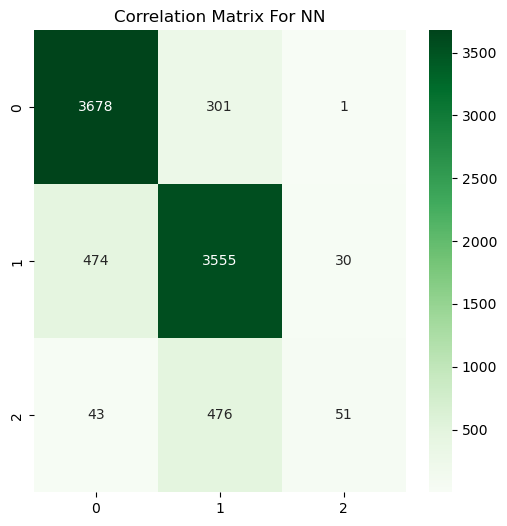

In [39]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Model evaluation
nn_model.eval()  

# predict test data 
with torch.no_grad():
    outputs = nn_model(X_test_tensor)
    _, predictions = torch.max(outputs, 1)  
    
    y_pred = predictions.cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

# Evaluate the model using various metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# add to dictionary
results_dict.update({"NN": [accuracy, precision, recall, f1]})

# confusion matrix
nn_conf_matrix = confusion_matrix(y_true, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

#plot confusino matrix
print('Confusion Matrix:')
fig, ax = plt.subplots(figsize = (6,6))
ax.set_title("Correlation Matrix For NN")
sns.heatmap(nn_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=df['label'].unique(), yticklabels=df['label'].unique(), ax=ax)
plt.show()


### Ensemble

Accuracy: 0.8974
Precision: 0.8993
Recall: 0.8974
F1-Score: 0.8962
Ensemble Accuracy: 0.8974


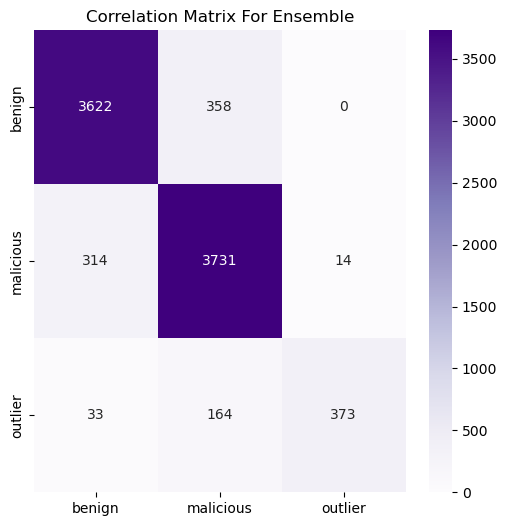

In [40]:
# Get probabilities from each model
rf_proba = model.predict_proba(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)

nn_model.eval()  
with torch.no_grad():
    nn_outputs = nn_model(X_test_tensor)
    nn_proba = torch.softmax(nn_outputs, dim=1).cpu().numpy()  

# Average the probabilities 
avg_proba = (rf_proba + xgb_proba + nn_proba) / 3

# Get final predictions by selecting the class with the highest probability
final_predictions = np.argmax(avg_proba, axis=1)

# Evaluate accuracy
accuracy = np.mean(final_predictions == y_test)
precision = precision_score(y_test, final_predictions, average='weighted') 
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')

# add to dictionary
results_dict.update({"Ensemble": [accuracy, precision, recall, f1]})

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Ensemble Accuracy: {accuracy:.4f}')

# Calculate the confusion matrix
ensemble_cm = confusion_matrix(y_test, final_predictions)

# Display the confusion matrix
fig, ax = plt.subplots(figsize = (6,6))
labels = ['benign','malicious','outlier']
ax.set_title("Correlation Matrix For Ensemble")
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

## Model Results Comparison

In [41]:
# define necessary things for plotting
labels = ['benign','malicious','outlier']
titles = ['NN', 'RF', 'XGB', "Ensemble"]
colours = ['Greens','Blues', 'Reds', "Purples"]

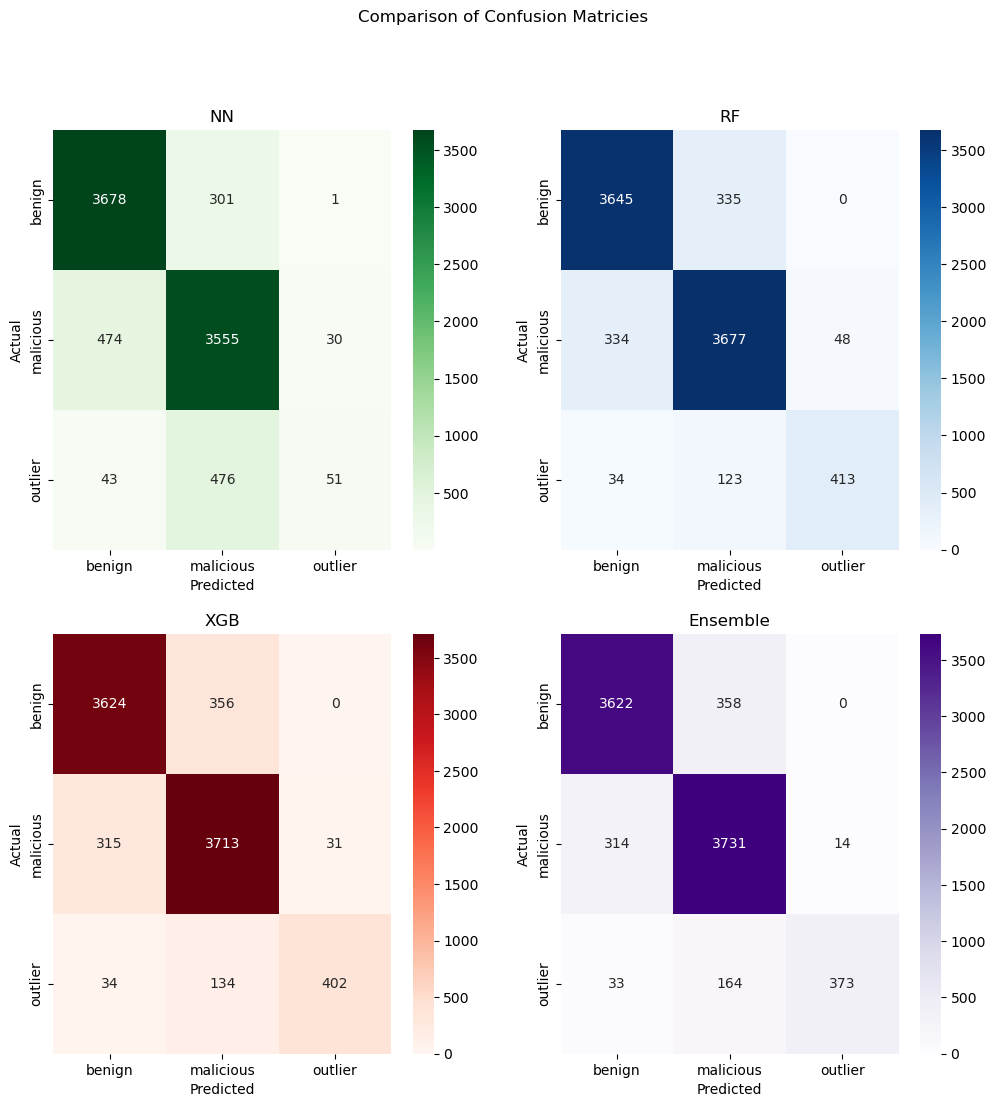

In [42]:
# plot confusino matrix comparison
fig, ax = plt.subplots(2,2, figsize = (12,12))
for i, cfm in enumerate([nn_conf_matrix, rf_conf_matrix, xgb_conf_matrix, ensemble_cm]): 
    sns.heatmap(cfm, annot=True, fmt='d', cmap=colours[i], xticklabels=labels, yticklabels=labels,ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(titles[i])
    ax[i//2][i%2].set_xlabel('Predicted')  
    ax[i//2][i%2].set_ylabel('Actual')  
fig.suptitle("Comparison of Confusion Matricies")
plt.show()

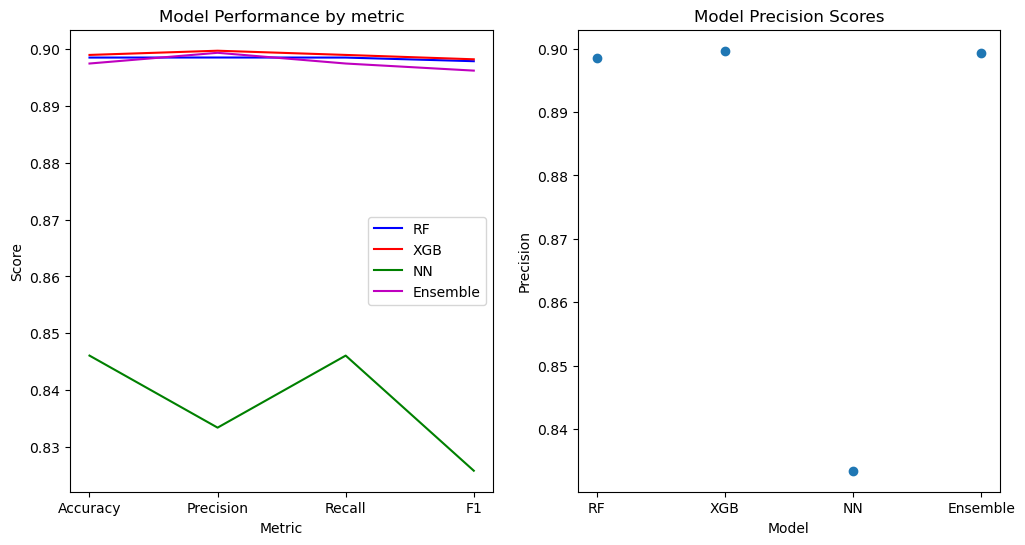

In [43]:
import matplotlib.pyplot as plt

colour_map = {"RF": "b", "XGB": "r", "NN": "g", "Ensemble": "m"}
fig, ax = plt.subplots(1,2,figsize=(12, 6))
# for second plot
x = []
y = []
for key in results_dict.keys():
    ax[0].plot(['Accuracy', 'Precision', 'Recall', 'F1'], results_dict[key], f"{colour_map[key]}-", label=key)
    x.append(key)
    y.append(results_dict[key][1])
ax[0].set_ylabel("Score")
ax[0].set_xlabel("Metric")
ax[0].set_title("Model Performance by metric")
#precision only
ax[1].plot(x, y, 'o')
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Precision")
ax[1].set_title("Model Precision Scores")
ax[0].legend()
plt.show()


### XGB is best performing model across metrics, including precision, which is important for cybersecurity. 

## Summary 

Goal was to identify whether ML can be used to accurately identify malicious traffic using the Kaggle honeypot dataset. 

Summary of steps taken: 
Cleaning: 
- nans and duplicates removed 
- 10% outliers removed 

Feature engineering: 
- packet_exchange, total_packets, total_bytes, byte_diff as well as hour, minute, second and day of week for both time_start and time_end added
- total_packets total_bytes byte_diff time_start_minute time_start_day_of_week time_end_minute time_end_day_of_week dropped due to high correlation 

Data Preparation: 
- proto changed to category
- src_ip, src_port, dest_ip, dest_port removed as they are not realisticly going to affect the outcome and are special due to the nature of experiment
- time_start, time_end removed as they have been split 
- Split to train, test, validate
- Data scaled

Models: 
- RF, XGB and NN fitted 
- All perform well on test data 
- XGB model is best and highest metrics across board, including precision, which is best for threat detection.

Information discerned from fitting: 
- duration, entropy, time_start_second, time_end_second, avg_ipt, total_entropy have strong importance for XGB
- bytes_out, duration and entropy have high importance for RF

To do: 
- test for model drift
- Adjust accordingly